## Final Project Submission

Please fill out:
* Student name: John Cho
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Rafael Carrasco
* Blog post URL: 


The approach to this project is to isolate and analyze the most successful movies, starting with metrics of revenue and profitability. The initial data set will be split into the top grossing domestic and foreign movies and cross referenced with studios, genres, reviews, popularity and key people. Correlations will be examined and recommendations made based on findings.

In [1]:
#Your code here - remember to use markdown cells for comments as well!
#Importing libraries, files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

gross = pd.read_csv('zippedData/bom.movie_gross.csv')
names = pd.read_csv('zippedData/name.basics.csv')
titles = pd.read_csv('zippedData/title.akas.csv')
titles2 = pd.read_csv('zippedData/title.basics.csv')
crews = pd.read_csv('zippedData/title.crew.csv')
principals = pd.read_csv('zippedData/title.principals.csv')
ratings = pd.read_csv('zippedData/title.ratings.csv')
tmdb = pd.read_csv('zippedData/tmdb.movies.csv')
budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')

In [2]:
#Preview data
display(gross.head(), names.head(), titles.head(), titles2.head(), crews.head(),
        principals.head(), ratings.head(), tmdb.head(), budgets.head())

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
#We'll start with the 'budgets' table
#Dropping irrelevant columns (not possible to drop multiple columns in a single command?)
df = budgets.drop('id', axis=1)
df = df.drop('release_date', axis=1)

#Checking for null, duplicate values
display(df.info(), df.isna().sum(), len(df[df.duplicated(subset='movie')]))

#Drop duplicates
df.drop_duplicates(subset='movie', inplace=True)
display(df.shape, len(df[df.duplicated(subset='movie')]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 4 columns):
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: object(4)
memory usage: 180.8+ KB


None

movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

84

(5698, 4)

0

In [45]:
#Set movie titles as index to use for joins, scrape additional 'domestic_gross' values from table 'gross'
df1 = df.set_index('movie')
df1.index.rename(name='title', inplace=True)
df2 = gross.set_index('title')

#New column will be 'domestic_gross_1'
df1 = df1.join(df2.domestic_gross, rsuffix='_1')
display(df1.head(), f'null values: {df1.domestic_gross_1.isna().sum()}')

,production_budget,domestic_gross,worldwide_gross,domestic_gross_1
title,,,,
#Horror,"$1,500,000",$0,$0,NaN
(500) Days of Summer,"$7,500,000","$32,425,665","$34,439,060",NaN
10 Cloverfield Lane,"$5,000,000","$72,082,999","$108,286,422",72100000.0
10 Days in a Madhouse,"$12,000,000","$14,616","$14,616",NaN
10 Things I Hate About You,"$13,000,000","$38,177,966","$60,413,950",NaN


'null values: 4462'

In [46]:
#Remove rows with $0 values in both domestic and worldwide only
df2 = df1[df1.domestic_gross == '$0']
df2 = df2[df2.worldwide_gross == '$0']
display(df1.shape, df2.shape)
for zero in df2.index:
    df1.drop(zero, axis=0, inplace=True)
display(df1.shape)

#Carry over a valid 'domestic_gross' value from new '_1' column if current value is 0
x = 0 #counter
for dom in df1.domestic_gross:
    if dom == '$0' and df1.domestic_gross_1.iloc[x] > 0:
        #display(df1.iloc[x].domestic_gross) #before
        df1.domestic_gross.iloc[x] = f"${df1.domestic_gross_1.iloc[x].astype(int)}"
        #display(df1.iloc[x].domestic_gross) #after
    x += 1
    
#Drop redundant 'domestic_gross_1' column
df1.drop('domestic_gross_1', axis=1, inplace=True)
df1

(5698, 4)

(361, 4)

(5337, 4)

,production_budget,domestic_gross,worldwide_gross
title,,,
(500) Days of Summer,"$7,500,000","$32,425,665","$34,439,060"
10 Cloverfield Lane,"$5,000,000","$72,082,999","$108,286,422"
10 Days in a Madhouse,"$12,000,000","$14,616","$14,616"
10 Things I Hate About You,"$13,000,000","$38,177,966","$60,413,950"
"10,000 B.C.","$105,000,000","$94,784,201","$269,065,678"
...,...,...,...
mother!,"$30,000,000","$17,800,004","$42,531,076"
xXx,"$70,000,000","$141,930,000","$267,200,000"
xXx: Return of Xander Cage,"$85,000,000","$44,898,413","$345,033,359"


In [47]:
#Bring over column 'studio' from table 'gross'
df2 = gross.set_index('title')
df1 = df1.join(df2.studio)
display(df1.head(), f'null values: {df1.studio.isna().sum()}')

,production_budget,domestic_gross,worldwide_gross,studio
title,,,,
(500) Days of Summer,"$7,500,000","$32,425,665","$34,439,060",NaN
10 Cloverfield Lane,"$5,000,000","$72,082,999","$108,286,422",Par.
10 Days in a Madhouse,"$12,000,000","$14,616","$14,616",NaN
10 Things I Hate About You,"$13,000,000","$38,177,966","$60,413,950",NaN
"10,000 B.C.","$105,000,000","$94,784,201","$269,065,678",NaN


'null values: 4102'

In [48]:
display(df1.head(), f'null values: {df1.studio.isna().sum()}')

,production_budget,domestic_gross,worldwide_gross,studio
title,,,,
(500) Days of Summer,"$7,500,000","$32,425,665","$34,439,060",NaN
10 Cloverfield Lane,"$5,000,000","$72,082,999","$108,286,422",Par.
10 Days in a Madhouse,"$12,000,000","$14,616","$14,616",NaN
10 Things I Hate About You,"$13,000,000","$38,177,966","$60,413,950",NaN
"10,000 B.C.","$105,000,000","$94,784,201","$269,065,678",NaN


'null values: 4102'

In [49]:
#Bring over column 'foreign_gross'
df2 = gross.set_index('title')
df1 = df1.join(df2.foreign_gross)
display(df1.head(), f'null values: {df1.foreign_gross.isna().sum()}', df1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5337 entries, (500) Days of Summer to é·æ±ä¸è (CJ7)
Data columns (total 5 columns):
production_budget    5337 non-null object
domestic_gross       5337 non-null object
worldwide_gross      5337 non-null object
studio               1235 non-null object
foreign_gross        1078 non-null object
dtypes: object(5)
memory usage: 250.2+ KB


,production_budget,domestic_gross,worldwide_gross,studio,foreign_gross
title,,,,,
(500) Days of Summer,"$7,500,000","$32,425,665","$34,439,060",NaN,NaN
10 Cloverfield Lane,"$5,000,000","$72,082,999","$108,286,422",Par.,38100000
10 Days in a Madhouse,"$12,000,000","$14,616","$14,616",NaN,NaN
10 Things I Hate About You,"$13,000,000","$38,177,966","$60,413,950",NaN,NaN
"10,000 B.C.","$105,000,000","$94,784,201","$269,065,678",NaN,NaN


'null values: 4259'

None

In [7]:
#Convert null values to $0 and fill in $0 'worldwide_gross' value if 'foreign_gross' value exists
df1.foreign_gross.fillna(value=0, inplace=True)

#x = 0 #counter
#for world in df1.worldwide_gross:
#    if world == '$0' and df1.iloc[x].foreign_gross > 0:
#        display(df1.iloc[x].worldwide_gross) #before
#        df1.iloc[x].worldwide_gross = f"${df1.iloc[x].domestic_gross.astype(int) + df1.iloc[x].foreign_gross.astype(int)}"
#        display(df1.iloc[x].worldwide_gross) #after
#    x += 1

In [53]:
#Remove '$' and ',' in all numbers
df2 = df1
df2.worldwide_gross.astype('str').replace('$', '')


title
(500) Days of Summer           $34,439,060
10 Cloverfield Lane           $108,286,422
10 Days in a Madhouse              $14,616
10 Things I Hate About You     $60,413,950
10,000 B.C.                   $269,065,678
                                  ...     
mother!                        $42,531,076
xXx                           $267,200,000
xXx: Return of Xander Cage    $345,033,359
Ã l\'intÃ©rieur                   $895,932
é·æ±ä¸è (CJ7)             $47,300,771
Name: worldwide_gross, Length: 5337, dtype: object

In [16]:
#Plot 
df2 = df2.groupby(['studio']).mean().sort_values(by='profit_margin', ascending=False)
df2 = df2.iloc[0:30]
df2.groupby(['studio'])['profit_margin'].mean().sort_values().plot(kind='barh', figsize=(15,8))
plt.title('Studios by Average Profit Margin')
plt.xlabel("Avg. Profit Margin")

TypeError: arg must be a list, tuple, 1-d array, or Series

In [ ]:
#Dealing with outliers
for col in df.columns:
    print(col,'\n', df[col].value_counts().head(), '\n\n')

In [ ]:
#Cleanup 'worldwide_gross' column of '$'' and ','
#budget1.worldwide_gross = budget1.worldwide_gross.str.replace('$', '')
#budget1.worldwide_gross = budget1.worldwide_gross.str.replace(',','')
#budget1.worldwide_gross = budget1.worldwide_gross.fillna(0)
#budget1.worldwide_gross = budget1.worldwide_gross.astype('float64')

#Perform join
#for1 = foreign.set_index('title')
#for1 = for1.join(budget1.worldwide_gross)
#for1.worldwide_gross = for1.worldwide_gross.fillna(0)
#pd.set_option('display.float_format', lambda x: '%.2f' % x)
#for1

In [5]:
#Looks like the first table is sorted by either revenues - let's confirm
print(gross.domestic_gross.max())
print(gross.foreign_gross.max())

936700000.0


In [4]:
#Looks like some cleaning needed for column 'foreign_values'
display(gross.info(), gross.foreign_gross.value_counts(dropna = False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


None

NaN          1350
1200000        23
1100000        14
1900000        12
4200000        12
             ... 
236300000       1
100100000       1
45800           1
43400000        1
18300000        1
Name: foreign_gross, Length: 1205, dtype: int64

In [5]:
#'main' will be what we will work with from this point forward using modified data
#Replace 'Nan' values with 0
main = gross
main.foreign_gross = main.foreign_gross.fillna(0)
main.foreign_gross.value_counts(dropna = False)

#Convert entire column to 'float64'
main.foreign_gross = pd.to_numeric(main.foreign_gross.replace(',',''), errors='coerce')
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     3382 non-null float64
year              3387 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [6]:
#Now both max figures should display
display(main.domestic_gross.max(), main.foreign_gross.max())

936700000.0

960500000.0

In [7]:
#Confirmed data is not sorted by either revenues, let's sort by domestic and foreign into separate tables
domestic = main.sort_values(by='domestic_gross', ascending=False)
foreign = main.sort_values(by='foreign_gross', ascending=False)
display(domestic, foreign)

#Take a look at some other metrics
display(domestic.describe().round(), domestic.domestic_gross.median())
display(foreign.describe().round(), foreign.foreign_gross.median())

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,NaN,2015
3080,Black Panther,BV,700100000.0,646900000.0,2018
3079,Avengers: Infinity War,BV,678800000.0,NaN,2018
1873,Jurassic World,Uni.,652300000.0,NaN,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,NaN,49600000.0,2015
2392,Finding Mr. Right 2,CL,NaN,114700000.0,2016
2468,Solace,LGP,NaN,22400000.0,2016
2595,Viral,W/Dim.,NaN,552000.0,2016


,title,studio,domestic_gross,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018
1127,Frozen,BV,400700000.0,875700000.0,2013
...,...,...,...,...,...
1872,Star Wars: The Force Awakens,BV,936700000.0,NaN,2015
1873,Jurassic World,Uni.,652300000.0,NaN,2015
1874,Furious 7,Uni.,353000000.0,NaN,2015
2760,The Fate of the Furious,Uni.,226000000.0,NaN,2017


,domestic_gross,foreign_gross,year
count,3359.0,3382.0,3387.0
mean,28745845.0,45096366.0,2014.0
std,66982498.0,112754321.0,2.0
min,100.0,0.0,2010.0
25%,120000.0,0.0,2012.0
50%,1400000.0,1500000.0,2014.0
75%,27900000.0,29200000.0,2016.0
max,936700000.0,960500000.0,2018.0


1400000.0

,domestic_gross,foreign_gross,year
count,3359.0,3382.0,3387.0
mean,28745845.0,45096366.0,2014.0
std,66982498.0,112754321.0,2.0
min,100.0,0.0,2010.0
25%,120000.0,0.0,2012.0
50%,1400000.0,1500000.0,2014.0
75%,27900000.0,29200000.0,2016.0
max,936700000.0,960500000.0,2018.0


1500000.0

In [8]:
#Drop bottom 50 percentile and 'foreign_gross' column in 'domestic'
domestic = domestic.reset_index(drop=True)
domestic = domestic[:-1693]
domestic = domestic.drop('foreign_gross', axis=1)
display(domestic.info(), domestic)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1694 entries, 0 to 1693
Data columns (total 4 columns):
title             1694 non-null object
studio            1694 non-null object
domestic_gross    1694 non-null float64
year              1694 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 53.1+ KB


None

,title,studio,domestic_gross,year
0,Star Wars: The Force Awakens,BV,936700000.0,2015
1,Black Panther,BV,700100000.0,2018
2,Avengers: Infinity War,BV,678800000.0,2018
3,Jurassic World,Uni.,652300000.0,2015
4,Marvel's The Avengers,BV,623400000.0,2012
...,...,...,...,...
1689,Housefull 3,Eros,1300000.0,2016
1690,Micmacs,SPC,1300000.0,2010
1691,Iris (2015),Magn.,1300000.0,2015
1692,Embrace of the Serpent,Osci.,1300000.0,2016


In [9]:
#Same for 'foreign' table - drop bottom 50th percentile and 'domestic_gross'
foreign = foreign.reset_index(drop=True)
foreign = foreign[:-1693]
#foreign = foreign.drop('domestic_gross', axis=1)
display(foreign.info(), foreign)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1694 entries, 0 to 1693
Data columns (total 5 columns):
title             1694 non-null object
studio            1690 non-null object
domestic_gross    1677 non-null float64
foreign_gross     1694 non-null float64
year              1694 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 66.3+ KB


None

,title,studio,domestic_gross,foreign_gross,year
0,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011
1,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015
2,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
3,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018
4,Frozen,BV,400700000.0,875700000.0,2013
...,...,...,...,...,...
1689,Incarnate,BH Tilt,4800000.0,1500000.0,2016
1690,Soldiers of Fortune,RAtt.,38900.0,1500000.0,2012
1691,I Still See You,LGF,1400.0,1500000.0,2018
1692,"Men, Women & Children",Par.,706000.0,1500000.0,2014


In [10]:
#Set movie titles as index to use for joins, add columns 'worldwide_gross' and 'production_budget' from 'budgets'
budget1 = budgets.set_index('movie')
budget1.index.rename(name='title', inplace=True)

#Cleanup 'worldwide_gross' column of '$'' and ','
budget1.worldwide_gross = budget1.worldwide_gross.str.replace('$', '')
#below command causes join to fill in all zeros.. why?? had to find alternative to remove commas
#budget1.worldwide_gross = pd.to_numeric(budget1.worldwide_gross.replace(',',''), errors='coerce')
budget1.worldwide_gross = budget1.worldwide_gross.str.replace(',','')
budget1.worldwide_gross = budget1.worldwide_gross.fillna(0)
budget1.worldwide_gross = budget1.worldwide_gross.astype('float64')

#Perform join
for1 = foreign.set_index('title')
for1 = for1.join(budget1.worldwide_gross)
for1.worldwide_gross = for1.worldwide_gross.fillna(0)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
for1

,studio,domestic_gross,foreign_gross,year,worldwide_gross
title,,,,,
10 Cloverfield Lane,Par.,72100000.00,38100000.00,2016,108286422.00
102 Not Out,Sony,1300000.00,10900000.00,2018,0.00
11-11-11,Rocket,32800.00,5700000.00,2011,0.00
12 Strong,WB,45800000.00,21600000.00,2018,71118378.00
12 Years a Slave,FoxS,56700000.00,131100000.00,2013,181025343.00
...,...,...,...,...,...
Zoolander 2,Par.,28800000.00,27900000.00,2016,55348693.00
Zootopia,BV,341300000.00,682500000.00,2016,1019429616.00
[Rec] 2,Magn.,27800.00,18500000.00,2010,18527766.00


In [11]:
#Same for column 'production_budget'

budget1.production_budget = budget1.production_budget.str.replace('$', '')
budget1.production_budget = budget1.production_budget.str.replace(',','')
budget1.production_budget = budget1.production_budget.fillna(0)
budget1.production_budget = budget1.production_budget.astype('float64')

for1 = for1.join(budget1.production_budget)
for1.production_budget = for1.production_budget.fillna(0)
for1 = for1.sort_values(by='foreign_gross', ascending=False)
for1

,studio,domestic_gross,foreign_gross,year,worldwide_gross,production_budget
title,,,,,,
Harry Potter and the Deathly Hallows Part 2,WB,381000000.00,960500000.00,2011,0.00,0.00
Avengers: Age of Ultron,BV,459000000.00,946400000.00,2015,1403013963.00,330600000.00
Marvel's The Avengers,BV,623400000.00,895500000.00,2012,0.00,0.00
Jurassic World: Fallen Kingdom,Uni.,417700000.00,891800000.00,2018,1305772799.00,170000000.00
Frozen,BV,400700000.00,875700000.00,2013,1272469910.00,150000000.00
...,...,...,...,...,...,...
Incendies (U.S. only),SPC,2100000.00,1500000.00,2011,0.00,0.00
Beloved (2012),IFC,138000.00,1500000.00,2012,0.00,0.00
Soldiers of Fortune,RAtt.,38900.00,1500000.00,2012,0.00,0.00


In [12]:
#Start calculating profit margins - remove row if production_budget value is 0
count = 0
for x in for1.production_budget:
    if x == 0:
        for1.drop(for1.index[count], inplace=True)
        count -= 1
    count += 1
for1

,studio,domestic_gross,foreign_gross,year,worldwide_gross,production_budget
title,,,,,,
Avengers: Age of Ultron,BV,459000000.00,946400000.00,2015,1403013963.00,330600000.00
Jurassic World: Fallen Kingdom,Uni.,417700000.00,891800000.00,2018,1305772799.00,170000000.00
Frozen,BV,400700000.00,875700000.00,2013,1272469910.00,150000000.00
Transformers: Age of Extinction,Par.,245400000.00,858600000.00,2014,1104039076.00,210000000.00
Minions,Uni.,336000000.00,823400000.00,2015,1160336173.00,74000000.00
...,...,...,...,...,...,...
The Words,CBS,11500000.00,1700000.00,2012,16369708.00,6000000.00
Brighton Rock,IFC,230000.00,1600000.00,2011,229653.00,11000000.00
Just Getting Started,BG,6100000.00,1600000.00,2017,6756412.00,22000000.00


In [13]:
#Create new column 'profit_margin'
for1['profit_margin'] = pd.Series()
for1.profit_margin = 0.00

for x in for1:
    for1.profit_margin = ((for1.worldwide_gross - for1.production_budget) / for1.production_budget * 100).round(2)
for1 = for1.sort_values(by='worldwide_gross', ascending=False)
for1

,studio,domestic_gross,foreign_gross,year,worldwide_gross,production_budget,profit_margin
title,,,,,,,
Avengers: Age of Ultron,BV,459000000.00,946400000.00,2015,1403013963.00,330600000.00,324.38
Black Panther,BV,700100000.00,646900000.00,2018,1348258224.00,200000000.00,574.13
Jurassic World: Fallen Kingdom,Uni.,417700000.00,891800000.00,2018,1305772799.00,170000000.00,668.10
Frozen,BV,400700000.00,875700000.00,2013,1272469910.00,150000000.00,748.31
Incredibles 2,BV,608600000.00,634200000.00,2018,1242520711.00,200000000.00,521.26
...,...,...,...,...,...,...,...
The Gambler,Par.,33700000.00,5600000.00,2014,101773.00,25000000.00,-99.59
Mr. Nobody,Magn.,3600.00,3500000.00,2013,22254.00,46500000.00,-99.95
Trance,FoxS,2300000.00,21900000.00,2013,0.00,950000.00,-100.00


In [14]:
#Fill in last 3 missing 'worldwide_gross' values by adding up the other 2
for x in for1.worldwide_gross:
    if x == 0:
        for1.worldwide_gross = (for1.domestic_gross + for1.foreign_gross).round(2)
        for1.profit_margin = ((for1.worldwide_gross - for1.production_budget) / for1.production_budget * 100).round(2)

for1 = for1.sort_values(by='worldwide_gross', ascending=False)
for1

,studio,domestic_gross,foreign_gross,year,worldwide_gross,production_budget,profit_margin
title,,,,,,,
Avengers: Age of Ultron,BV,459000000.00,946400000.00,2015,1405400000.00,330600000.00,325.11
Black Panther,BV,700100000.00,646900000.00,2018,1347000000.00,200000000.00,573.50
Jurassic World: Fallen Kingdom,Uni.,417700000.00,891800000.00,2018,1309500000.00,170000000.00,670.29
Frozen,BV,400700000.00,875700000.00,2013,1276400000.00,150000000.00,750.93
Incredibles 2,BV,608600000.00,634200000.00,2018,1242800000.00,200000000.00,521.40
...,...,...,...,...,...,...,...
The Gambler,Par.,33700000.00,5600000.00,2014,39300000.00,25000000.00,57.20
Mr. Nobody,Magn.,3600.00,3500000.00,2013,3503600.00,46500000.00,-92.47
Trance,FoxS,2300000.00,21900000.00,2013,24200000.00,950000.00,2447.37


In [63]:
#just drop the last row
for1.drop(for1.index[-1], inplace=True)
for1

,studio,domestic_gross,foreign_gross,year,worldwide_gross,production_budget,profit_margin
title,,,,,,,
Avengers: Age of Ultron,BV,459000000.00,946400000.00,2015,1405400000.00,330600000.00,325.11
Black Panther,BV,700100000.00,646900000.00,2018,1347000000.00,200000000.00,573.50
Jurassic World: Fallen Kingdom,Uni.,417700000.00,891800000.00,2018,1309500000.00,170000000.00,670.29
Frozen,BV,400700000.00,875700000.00,2013,1276400000.00,150000000.00,750.93
Incredibles 2,BV,608600000.00,634200000.00,2018,1242800000.00,200000000.00,521.40
...,...,...,...,...,...,...,...
The Rover,A24,1100000.00,2100000.00,2014,3200000.00,8500000.00,-62.35
Fish Tank,IFC,375000.00,2000000.00,2010,2375000.00,3000000.00,-20.83
Bilal: A New Breed of Hero,VE,491000.00,1700000.00,2018,2191000.00,30000000.00,-92.70


Text(0.5, 0, 'Avg. Profit Margin')

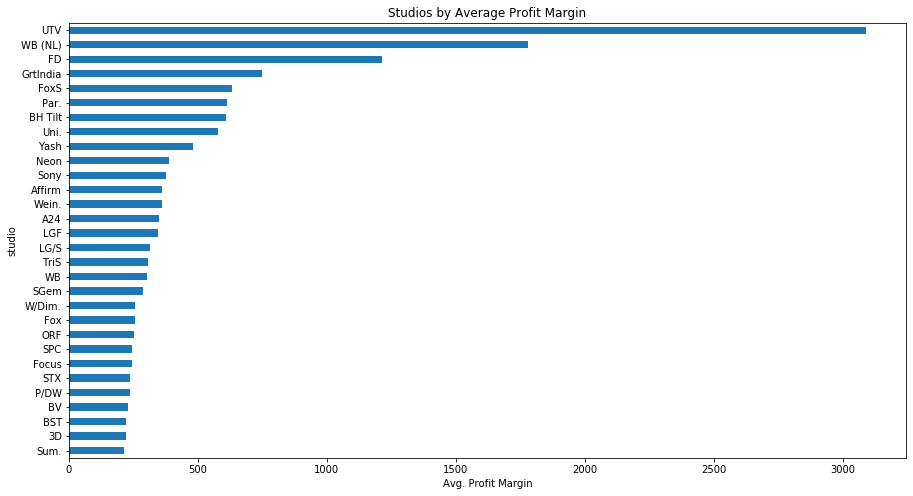

In [76]:
#display(for1.groupby(['studio']).mean().head(20).sort_values(by='profit_margin', ascending=False))
#display(for1.groupby(['studio']).median().head(20).sort_values(by='profit_margin', ascending=False))
#display(for1.groupby(['studio']).sum().head(20).sort_values(by='profit_margin', ascending=False))
#display(for1.groupby(['studio']).sum().head(20).sort_values(by='year', ascending=False))

for2 = for1.groupby(['studio']).mean().sort_values(by='profit_margin', ascending=False)
for2 = for2.iloc[0:30]
for2.groupby(['studio'])['profit_margin'].median().sort_values().plot(kind='barh', figsize=(15,8))
plt.title('Studios by Average Profit Margin')
plt.xlabel("Avg. Profit Margin")


Text(0.5, 0, 'Avg. Median Margin')

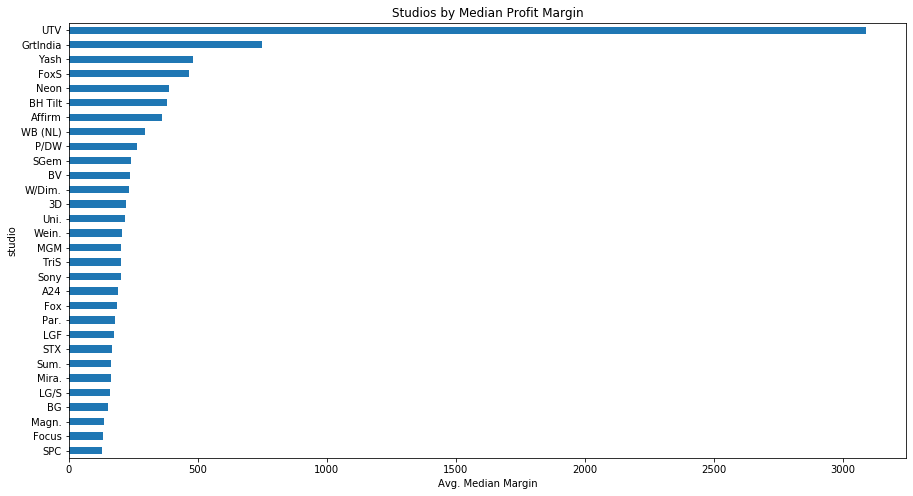

In [75]:
for2 = for1.groupby(['studio']).median().sort_values(by='profit_margin', ascending=False)
for2 = for2.iloc[0:30]
for2.groupby(['studio'])['profit_margin'].median().sort_values().plot(kind='barh', figsize=(15,8))
plt.title('Studios by Median Profit Margin')
plt.xlabel("Avg. Median Margin")

Text(0.5, 0, 'Avg. Worldwide Gross')

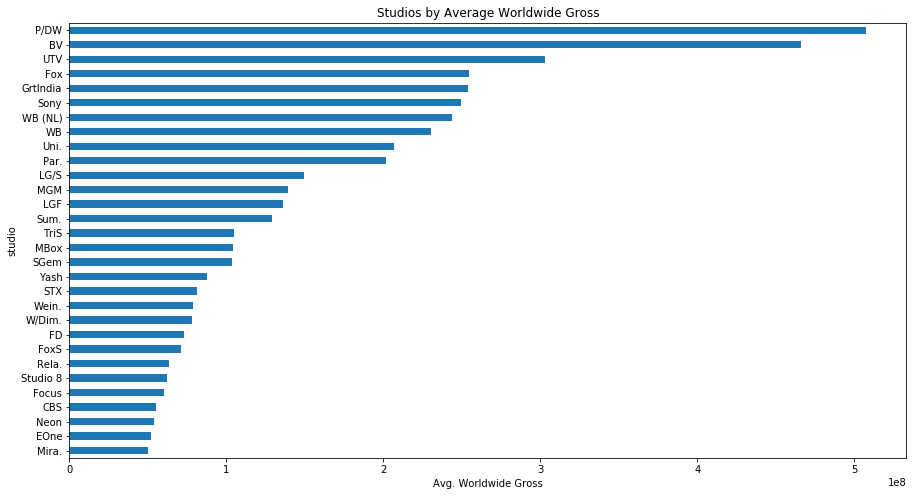

In [78]:
for2 = for1.groupby(['studio']).mean().sort_values(by='worldwide_gross', ascending=False)
for2 = for2.iloc[0:30]
for2.groupby(['studio'])['worldwide_gross'].mean().sort_values().plot(kind='barh', figsize=(15,8))
plt.title('Studios by Average Worldwide Gross')
plt.xlabel("Avg. Worldwide Gross")